In [1]:
## Implement LSTM
## This example was implemented by Outback Workshop Yotube and uses a recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock 
## price of Tesla stocks using the last 60 day stock price. 

In [2]:
## Import the necessary libraries need 
import math 
import pandas_datareader as web 
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [3]:
## Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [4]:
## Show the data frame 
df # or df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


In [5]:
## Get the number of rows and columns in the data set 
df.shape

(2003, 6)

Text(0, 0.5, 'Close Price USD ($)')

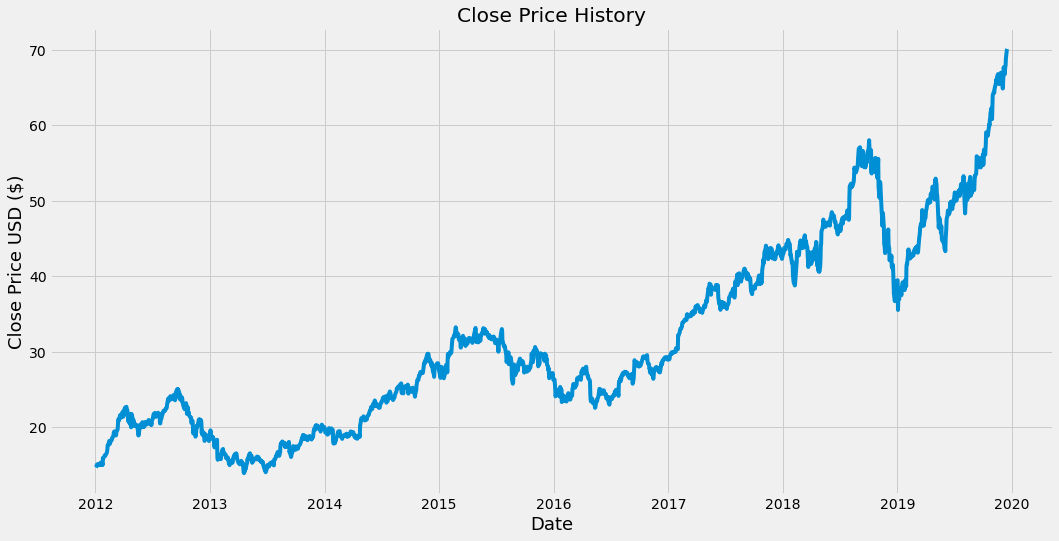

In [6]:
## Visualise the closing price history 
plt.figure(figsize=(16,8)) # Size of figure 
plt.title('Close Price History') # Title of plot 
plt.plot(df['Close']) # Implement plot with some data
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)


In [7]:
## Create a new dataframe with only the close column
data = df.filter(['Close'])
## Convert the dataframe to a numpy array 
dataset = data.values 
## Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1603

In [8]:
## Scale the data, make it between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [9]:
## Create the training data set 
## Create the scaled training data set 
train_data = scaled_data[0:training_data_len, :]
## Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(90, len(train_data)):
    x_train.append(train_data[i-90:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 90:
        print(x_train)
        print(y_train)
        print()
## The x_train contains the past 60 values we are using to train, while the y_train value contains the 61st value that
## want our model to predict

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [10]:
## Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
## Reshape the data, as the LSTM expects the data to come in as 3D, as it is now currently 2D
x_train.shape # shows that it only has two values, hence 2D

(1543, 60)

In [12]:
## Reshape the data into a 3D array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [13]:
## Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
## Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
## Train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 40s 23ms/step - loss: 0.0019


In [16]:
## Create the testing data set 
## Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 90: , :]
## Create the data sets x_test and y_test 
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(90, len(test_data)):
    x_test.append(test_data[i-90:i, 0])

In [17]:
## Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
## Reshape the data because it is currently 2D and needs to be 3D 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
## Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
## Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1.5624561023712158

<ipython-input-21-cc2bb1827526>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


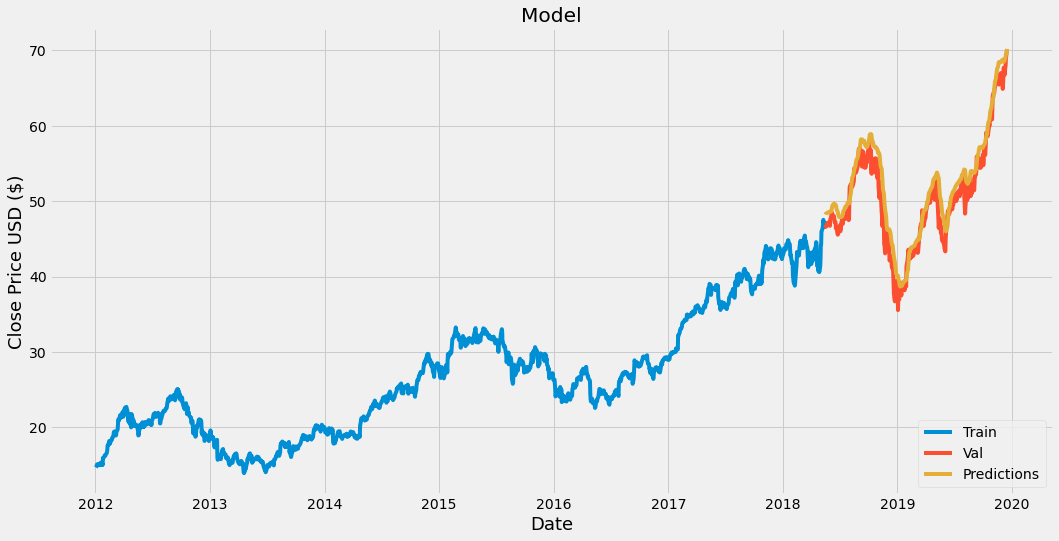

In [21]:
## Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 
## Visualise the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [22]:
## Show the valid or actual price and predicted prices 
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,48.219524
2018-05-18,46.577499,48.333660
2018-05-21,46.907501,48.374336
2018-05-22,46.790001,48.412247
2018-05-23,47.090000,48.429165
...,...,...
2019-12-11,67.692497,68.927757
2019-12-12,67.864998,69.143379
2019-12-13,68.787498,69.377625


In [23]:
## Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
## Create a new dataframe 
new_df = apple_quote.filter(['Close'])
## Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
## Scale the data to be values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)
## Create an empty list 
x_test = []
## Append the past 60 days 
x_test.append(last_60_days_scaled)
## Convert the X_test data to a numpy array 
x_test = np.array(x_test)
## Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
## Get the predicted scaled price
pred_price = model.predict(x_test)
## Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[70.641304]]


In [24]:
## Get the quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
